### Assignment 1: Predict water temperature using scikit-learn regression
##### Natalie Kim

In [1]:
import pandas as pd

#### Part A: Data Cleaning & Exploratory Analysis

##### 1. Import full data set using Pandas:
- Verify shape is: (864863,74)

In [3]:
data = pd.read_csv(r'/Users/xnxk040/Library/CloudStorage/OneDrive-TheUniversityofChicago/machine learning/ml data/bottle.csv',
                  low_memory=False)

In [4]:
data.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

##### 2. Limit the dataset to columns: [T_degC, Salnty, STheta] and then remove all NaN and NA values
- Verify the shape is: (812174, 3)

In [29]:
# Subset data
dat2 = data[['T_degC', 'Salnty', 'STheta']]

# Remove NaN and NA
dat_cleaned = dat2.dropna()

In [115]:
dat_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 812174 entries, 0 to 864862
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   T_degC  812174 non-null  float64
 1   Salnty  812174 non-null  float64
 2   STheta  812174 non-null  float64
dtypes: float64(3)
memory usage: 24.8 MB


##### 3. Build the following plots using matplotlib:
- Scatter: Salnty (salinity of water) vs T_degC
- Scatter: STheta (density of water) vs T_degC

In [30]:
import matplotlib.pyplot as plt

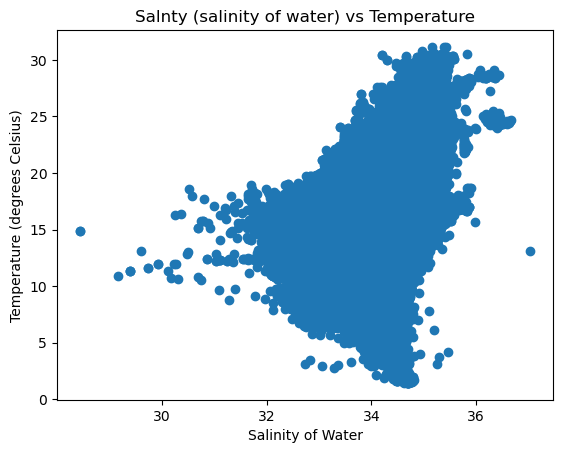

In [31]:
# create plot
plt.scatter(dat_cleaned['Salnty'],dat_cleaned['T_degC'])

# add titles and labels
plt.title('Salnty (salinity of water) vs Temperature')
plt.xlabel('Salinity of Water')
plt.ylabel('Temperature (degrees Celsius)')

# display the plot
plt.show()

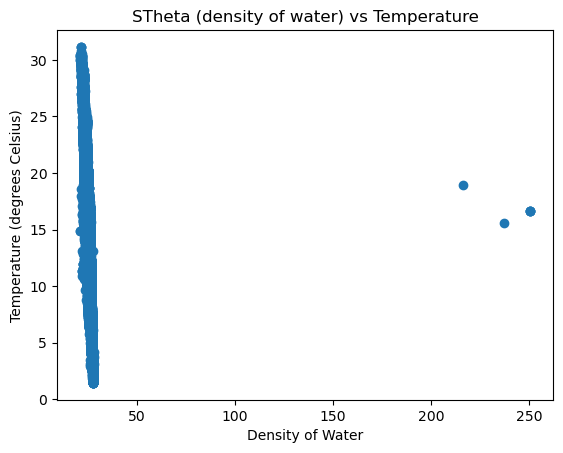

In [32]:
# create plot
plt.scatter(dat_cleaned['STheta'], dat_cleaned['T_degC'])

# add titles and labels
plt.title('STheta (density of water) vs Temperature')
plt.xlabel('Density of Water')
plt.ylabel('Temperature (degrees Celsius)')

# display the plot
plt.show()

##### 4. Build the following plot using seaborn:
- Distribution of T_degC

In [19]:
import seaborn as sns

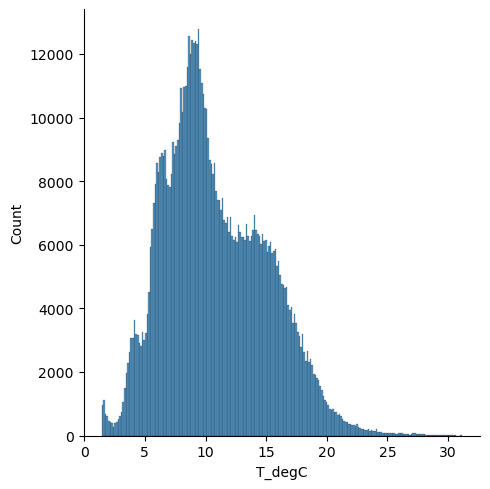

In [20]:
sns.displot(dat_cleaned['T_degC'])

##### 5. Remove obvious outliers from step 3b:
- Shape for clean data is (812168, 3)

In [34]:
# remove valaues from STheta that are greater than 50
dat_cln = pd.DataFrame(dat_cleaned[dat_cleaned['STheta'] <= 50])

In [36]:
dat_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 812168 entries, 0 to 864862
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   T_degC  812168 non-null  float64
 1   Salnty  812168 non-null  float64
 2   STheta  812168 non-null  float64
dtypes: float64(3)
memory usage: 24.8 MB


##### 6. Plot 3b again – does it look better? Explain

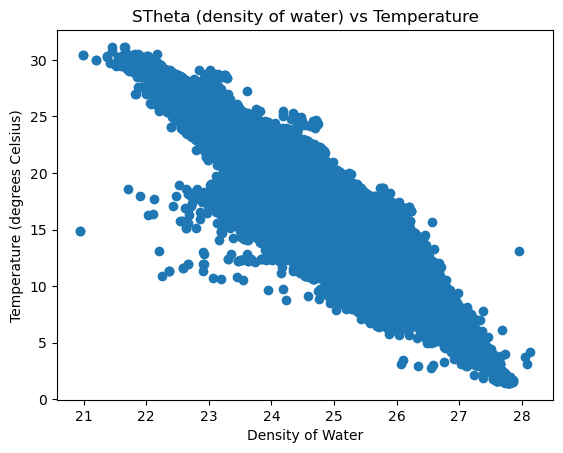

In [37]:
# create plot
plt.scatter(dat_cln['STheta'], dat_cln['T_degC'])

# add titles and labels
plt.title('STheta (density of water) vs Temperature')
plt.xlabel('Density of Water')
plt.ylabel('Temperature (degrees Celsius)')

# display the plot
plt.show()

Yes, this scatter plot is much better than our previous one in 3b. In our previous plot, the outliers caused our view of the data to look singular and grouped together. However, when we remove the outliers, we can now see a more distinct trend that gives us a completely different perspective on the relationship between the density of water and the temperature – it's a clear negative linear relationship.

#### Part B: Train & Test Split

In [40]:
from sklearn.model_selection import train_test_split

In [45]:
# X and y matrices
X = dat_cln[['Salnty','STheta']]
y = dat_cln[['T_degC']]

# split the data 80:20 for train to test ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Part C: Linear Regression Using Normal Equation - Coded in Python
Use numpy to build linear regression model. Use closed-form solution: Normal Equation

In [47]:
import numpy as np

##### 1. Build normal equation using numpy & fit using training data.
- Note: include intercept value of 1 for every observation in X_train

In [70]:
X_b = np.c_[np.ones((X.shape[0],1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

##### 2. Print out coefficients

In [111]:
coeff_names = ['Intercept','Salnty', 'STheta']

coeff = {
    'Normal Equation': [theta_best[0,0],theta_best[1,0],theta_best[2,0]]
}

coeff = pd.DataFrame(coeff)
coeff.index = coeff_names

coeff

,Normal Equation
Intercept,35.708843
Salnty,3.108449
STheta,-5.037552


##### 3. Predict T_degC for the test data using the fitted values in (b)
- Include: intercept value of 1 for every observation in X_test
- Call predictions y_pred

In [72]:
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

In [73]:
y_pred = X_test_b.dot(theta_best)

##### 4. Calculate the following for test data:
- mean squared error
- r-squared
- explained variance

In [80]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

In [113]:
metric_names = ["Mean Squared Error", "R-Squared", "Explained Variance"]

lr_metrics = {
    'Normal Equation': [mean_squared_error(y_test, y_pred),
                        r2_score(y_test,y_pred),
                        explained_variance_score(y_test, y_pred)]
}

lr_metrics = pd.DataFrame(lr_metrics)
lr_metrics.index = metric_names

lr_metrics

,Normal Equation
Mean Squared Error,0.233771
R-Squared,0.986893
Explained Variance,0.986893


##### 5. Create scatterplot that shows actual versus predicted values for the T_degC

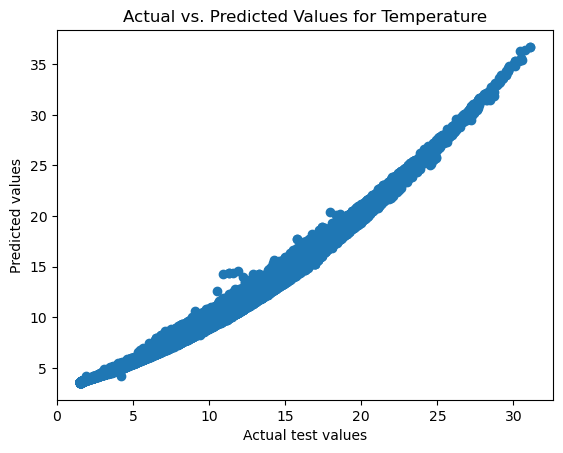

In [84]:
# create plot
plt.scatter(y_test, y_pred)

# title & labels
plt.title('Actual vs. Predicted Values for Temperature')
plt.xlabel('Actual test values')
plt.ylabel('Predicted values')

# show plot
plt.show()

#### Part D: Using sklearn API

In [85]:
from sklearn import linear_model

##### 1. Create instance of LinearRegression class called "lin_reg". Fit lin_reg using X_train & y_train
- note: sklearn will automatically add intercept term

In [86]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

##### 2. Print coefficients (including intercept)
- note: these should be exactly the same as Normal Equation coef

In [112]:
coeff['sklearn'] = [lin_reg.intercept_[0],lin_reg.coef_[0,0],lin_reg.coef_[0,1]]

coeff

,Normal Equation,sklearn
Intercept,35.708843,35.644512
Salnty,3.108449,3.111512
STheta,-5.037552,-5.039073


##### 3. Predict T_degC for the test data using the fitted values in b.
- Call predictions y_pred_sklearn

In [101]:
y_pred_sklearn = lin_reg.predict(X_test)

##### 4. Calculate the following for the test data:
- mean squared error
- r-squared
- explained variance

In [114]:
lr_metrics['sklearn'] = [mean_squared_error(y_test, y_pred_sklearn),
                         r2_score(y_test,y_pred_sklearn),
                         explained_variance_score(y_test, y_pred_sklearn)]

lr_metrics

,Normal Equation,sklearn
Mean Squared Error,0.233771,0.233783
R-Squared,0.986893,0.986892
Explained Variance,0.986893,0.986892


##### 5. Create scatterplot that shows actual versus predicted values for T_degC

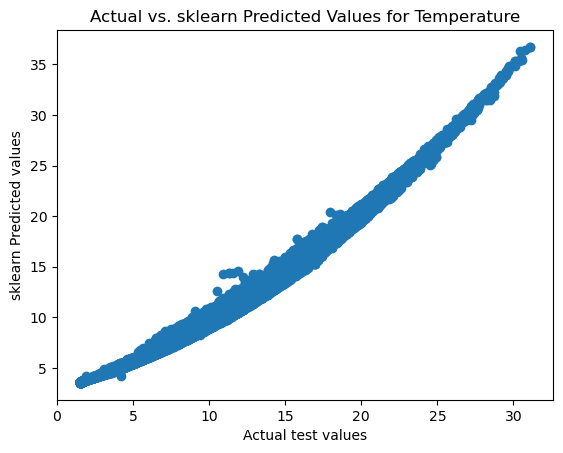

In [104]:
# create plot
plt.scatter(y_test, y_pred_sklearn)

# title & labels
plt.title('Actual vs. sklearn Predicted Values for Temperature')
plt.xlabel('Actual test values')
plt.ylabel('sklearn Predicted values')

# show plot
plt.show()

#### Part E: Conceptual Questions

##### 1. Why is it important to have a test set?
It's important to have a test set to avoid overfitting our model to the sample data that we have. We use this unseen data to have a more unbiased assessment of the model's performance.

##### 2. If the normal equation always provides a solution, when would we not want to use it?
The normal equation is not as efficient and does not handle edge cases as nicely - such as if the number of instances is greater than the number of features, or if some features are redundant but the pseudoinverse is defined. Another instance when we would not want to use the Normal Equation is when the computational complexity increases.

##### 3. How might we improve the fit of our models from Part C & D?
We could attempt to improve the fit of the model by transforming the response or we could transform the Salnty predictor. Additionally, we could attempt to clean the data more to remove any outliers that that we can see in the scatter plot. 

##### 4. As we move further into ML, we will need to continually consider the bias-variance tradeoff. Explain what bias is and what variance is in regards to the bias-variance tradeoff.
In the context of the bias-variance tradeoff, bias is model's training error and the variance is the difference between generalized error and training error. There is a tradeoff between these two because a model with higher variance will have lower training error (bias) but be at risk overfitting, but a model with lower variance will have greater bias and underfit the data - missing some key patterns.

##### 5. In a linear regression model, how might we reduce bias?
To reduce bias, we can increase the number of features to increase the model capcacity or reduce the model's constraints.

##### 6. In a linear regression model, how might we reduce variance?
To reduce variance, there are several things we can do. We could reduce the model's capacity be removing one of the parameters, get more training data, or improve the training data quality by reducing noise.